# Covid19 Web Crawler

El siguiente cuaderno es un web crawler (rastreador web, indexador web, spider web) que extraerá datos de un sitio web con datos estadísticos de la Covid 19 para presentarlos en una gráfica.

El Sitio Web a utilizar en este ejemplo es:
[Worldometers Coronavirus](https://www.worldometers.info/coronavirus)


# 1. Se importan las librerías requeridas

In [1]:
import requests as req          #Para recabar los datos del sitio web
from bs4 import BeautifulSoup   #Parsear contenido HTML
import numpy as np              #Operaciones numéricas con los datos
import pandas as pd             #Estructuras de datos como Series y DataFrames

# 2. Se obtienen los datos

In [2]:
#El método get() de requests (req) obtiene la informacion del sitio y la almacena en  la variable html
html = req.get("https://www.worldometers.info/coronavirus")

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/appl
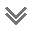

In [3]:
#Podemos revisar el contenido extraído del sitio web con el atributo content
html.content

# 3. Encontramos la tabla dentro del contenido HTML

In [4]:
#Parseamos el contenido html con BeautifulSoup()
html_parseado = BeautifulSoup(html.content)

In [5]:
'''
Buscamos la tabla requerida dentro del contenido HTML y la asignamos a la variable tabla.
Para conseguirlo, localizamos el nombre de la tabla inspeccionando el codigo fuente de la página.
En este caso, el nombre se encuentra en la linea con la etiqueta:
<table id="main_table_countries_today" class="table table-bordered...>
El id será el dato que nos interesa
'''
tabla = html_parseado.find('table', attrs={'id': 'main_table_countries_today'})

In [6]:
#Revisamos la tabla extraída imprimiendo su valor (contenido)
tabla

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New 

In [7]:
'''
Dado que cada fila representa los casos por país,
el metodo find_all() de la tabla obtiene todas las filas de la tabla extraída
'''
filas = tabla.find_all("tr")

In [8]:
#Revisaremos el resultado imprimiendo la primer fila de la tabla
filas[0]

<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

In [9]:
#Para retirar el marcado HTML, utilizaremos el metodo strip() del atributo text de la tabla
filas[0].text.strip()

'#\nCountry,Other\nTotalCases\nNewCases\nTotalDeaths\nNewDeaths\nTotalRecovered\nNewRecovered\nActiveCases\nSerious,Critical\nTot\xa0Cases/1M pop\nDeaths/1M pop\nTotalTests\nTests/\n1M pop\n\nPopulation\nContinent\n1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl\nNew Cases/1M pop\nNew Deaths/1M pop\nActive Cases/1M pop'

In [10]:
'''
Como se puede ver, el contenido está separado por secuencias de escape \n.
Podemos tokenizar los datos utilizando el método split() con \n como delimitador.
'''
filas[0].text.strip().split("\n")

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/',
 '1M pop',
 '',
 'Population',
 'Continent',
 '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

> Como podemos darnos cuenta, los elementos de la fila 0 son los titulos de la tabla. Por inspección, nos daremos cuenta de que la fila 9 de la tabla es el primer país (USA)

In [11]:
filas[9].text.strip().split("\n")

['1',
 'USA',
 '80,912,619',
 '',
 '983,837 ',
 '',
 '54,594,944',
 '',
 '25,333,838',
 '6,320',
 '242,074',
 '2,943',
 '956,334,581',
 '2,861,161',
 '334,247,090 ',
 'North America',
 '43400',
 '',
 '',
 '75,794']

# 4. Almacenamos los datos de la tabla

In [12]:
#Primero, almacenaremos los datos de la tabla dentro de una lista
datos = []
for x in filas:
    datos.append(x.text.strip().split("\n")[1:5]) #El slice indica que solo se quieren obtener las columnas 1 a 5

In [13]:
#Convertiremos la lista datos en un DataFrame de pandas, pasando como argumento la lista anterior
df = pd.DataFrame(datos)

In [14]:
#Revisemos el contenido del DataFrame para verificar que todo esté correcto
df.head()

,0,1,2,3
0,"Country,Other",TotalCases,NewCases,TotalDeaths
1,,"95,303,932","+8,688","1,414,469"
2,,"120,415,765","+265,822","1,358,678"
3,,"54,694,050",+33,"1,262,481"
4,,"159,615,165",,"1,721,765"


> Como nos podemos dar cuenta, la fila 0 corresponde a los encabezados de las columnas. Ya sabemos que el primer país (USA) se encuentra en la posición 9, así que construiremos de nuevo el DataFrame aplicando un slicing a partir la fila 9, estableciendo los encabezados de las columnas en la fila 0

In [15]:
#Establece la fila 0 como el encabezado, y retira la fila 1
df = pd.DataFrame(datos[9:], columns=datos[0])

In [16]:
#Revisaremos el DataFrame de nuevo
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths
0,USA,"80,912,619",,"983,837"
1,India,"42,962,658",,"515,063"
2,Brazil,"29,033,052",,"651,988"
3,France,"23,011,998",,"139,243"
4,UK,"19,119,181",,"162,008"


In [17]:
#Ahora, guardaremos los datos recolectados dentro de un archivo csv
df.to_csv('covid19.csv')

# 5. Visualizamos los datos

In [18]:
'''
Construiremos un gráfico con la información de dos columnas del DataFrame;
Estableceremos la columna Country,Other como el eje x,
Y la columna TotalCases como el eje Y
'''
df_plot = df[['Country,Other', 'TotalCases']]


# Para limitar nuestros resultados, dado que es demasiada información, obtendremos solo las primeras 10 filas (0 a 9)
df_plot = df_plot[:10]

In [19]:
# Vamos a revisar el DataFrame para comprobar que todo está correcto
df_plot.head()

,"Country,Other",TotalCases
0,USA,"80,912,619"
1,India,"42,962,658"
2,Brazil,"29,033,052"
3,France,"23,011,998"
4,UK,"19,119,181"


> Es importante darse cuenta de que los datos de la columna TotalCases son cadenas. Como necesitamos los valores numéricos, es necesario convertir los datos de dicha columna a enteros.

In [20]:
'''
Aplicaremos a la columna TotalCases lo siguiente:
con el metodo apply() pasaremos una funcion de una sola linea como argumento
que reeemplace los caracteres coma por ninguno, quitándolos.
Y luego, a lo que resulte lo convertiremos a tipo int
y lo asignaremos de nuevo a la columna TotalCases
'''
df_plot['TotalCases'] = df_plot['TotalCases'].apply(lambda x: x.replace(',','')).astype(int)

In [21]:
#Revisaremos de nuevo el DataFrame para comprobar que todo haya quedado correcto
df_plot.head()

,"Country,Other",TotalCases
0,USA,80912619
1,India,42962658
2,Brazil,29033052
3,France,23011998
4,UK,19119181


<AxesSubplot:xlabel='Country,Other'>

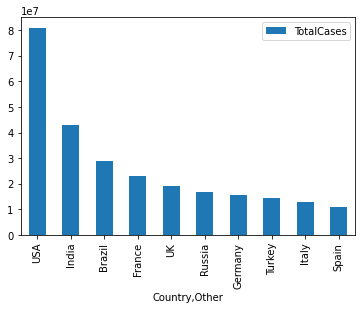

In [22]:
'''
Ahora, construiremos y mostraremos la gráfica. Será una de barras,
con Country,Other como el eje x
y TotalCases como el eje y
'''
df_plot.plot(kind='bar', x='Country,Other',y='TotalCases')